In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# df_x = [ 4, 4.5,  7,  6,  8,  8]
# df_y = [13,  12, 12, 15, 17, 19]
# x_small = np.arange(15)
# y_small = np.arange(10, 21)

n_df, size = 2000, 300
df_x = np.cumsum(np.random.randn(n_df))
df_y = np.cumsum(np.random.randn(n_df))
x_small = np.arange(-size, size)
y_small = np.arange(-size, size)

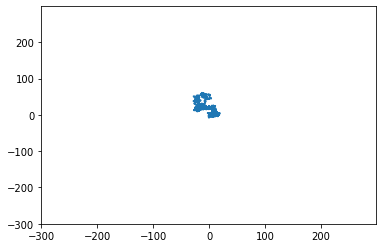

In [65]:
x_grid, y_grid = np.meshgrid(x_small, y_small)

# print("Dataframe x, y:", df_x, df_y)
# print("Grille x:")
# print(x_grid)
# print("Grille y:")
# print(y_grid)

plt.plot(df_x, df_y)
plt.xlim(x_small.min(), x_small.max())
plt.ylim(y_small.min(), y_small.max())
plt.show()

In [66]:
pos_df = np.vstack((df_x, df_y)).T
# print("Dataframe")
print(pos_df.shape)
pos_grid = np.vstack((x_grid.flatten(), y_grid.flatten())).T
# print("Grid")
print(pos_grid.shape)
# mask = np.zeros((x_grid.shape[0], x_grid.shape[1], pos_df.shape[0]))
mask = np.zeros(x_grid.shape)
print(mask.shape)

for i in range(pos_df.shape[0]):
    pos0 = pos_df[i, :].reshape((1, -1))
    dist = (np.sum(np.abs(pos_grid-pos0)**2,axis=1)**(1./2)).reshape(x_grid.shape)
    # mask[:, :, i] = dist < 2
    mask += dist < 2

# global_mask = np.sum(mask, axis=2) >=1
global_mask = mask>=1
print(global_mask.shape)

(2000, 2)
(360000, 2)
(600, 600)
(600, 600)


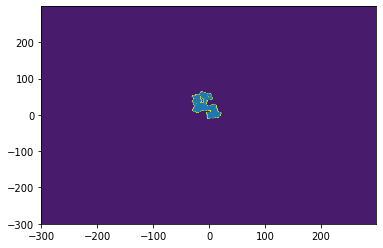

In [67]:
plt.contourf(x_small, y_small, global_mask)
plt.plot(df_x, df_y)